## Importing Libraries

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lasio
import missingno


# File handling

In [67]:
data = lasio.read(r"C:File Path")

In [68]:
data.sections.keys()

dict_keys(['Version', 'Well', 'Curves', 'Parameter', 'Other'])

 Converting LAS to Pandas dataframe so we can work on:

In [69]:
pdata = data.df()

In [70]:
pdata.reset_index(drop=True, inplace=True)

## Getting some insights from data

In [71]:
pdata.head(7)

,TVD,GR,SP,CALI,RT10,RT20,RT30,RT60,RT90,NPHI,DPHI,PE,RHOB,DRHO,SPHI,DELTAT
0,4098.0,28.881,86.094,8.194,1.848,1.496,1.333,1.275,1.231,0.143,0.177,4.756,2.407,0.015,0.157,69.753
1,4098.5,28.876,87.369,8.199,1.834,1.498,1.344,1.290,1.248,0.141,0.190,4.829,2.386,0.010,0.154,69.380
2,4099.0,26.491,88.806,8.202,1.904,1.566,1.411,1.358,1.317,0.137,0.194,4.718,2.379,0.005,0.150,68.823
3,4099.5,24.614,90.158,8.207,2.116,1.745,1.576,1.518,1.475,0.132,0.186,4.601,2.392,0.003,0.143,67.885
4,4100.0,24.347,91.737,8.208,2.585,2.117,1.909,1.836,1.787,0.120,0.174,4.498,2.413,0.005,0.135,66.693
5,4100.5,26.319,93.313,8.199,3.285,2.666,2.396,2.298,2.244,0.110,0.157,4.366,2.442,0.006,0.124,65.117
6,4101.0,28.962,95.774,8.198,4.121,3.337,2.985,2.859,2.808,0.096,0.129,4.409,2.489,0.009,0.112,63.381


In [212]:
# Deriving column names from datatable (can be used for dynamic visualizations) 

columns=pdata.columns.tolist()
columns.remove("TVD")
print(columns)

['GR', 'SP', 'CALI', 'RT10', 'RT20', 'RT30', 'RT60', 'RT90', 'NPHI', 'DPHI', 'PE', 'RHOB', 'DRHO', 'SPHI', 'DELTAT']


Statistical preview of data: 

In [73]:
pdata.describe()

,TVD,GR,SP,CALI,RT10,RT20,RT30,RT60,RT90,NPHI,DPHI,PE,RHOB,DRHO,SPHI,DELTAT
count,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3079.000000,3068.000000,3068.000000
mean,4867.500000,60.463532,130.077362,8.102111,42.375452,42.523525,43.021299,45.047142,48.612718,0.088318,0.071426,4.170992,2.587868,0.018876,0.116063,64.012206
std,444.487533,47.369537,35.566174,0.199516,80.618134,88.972893,97.040143,106.611170,117.879162,0.080303,0.059946,0.656135,0.102498,0.028358,0.091071,12.877340
min,4098.000000,9.149000,63.201000,7.627000,1.218000,1.039000,0.942000,0.911000,0.881000,0.000000,-0.006000,2.095000,2.102000,-0.037000,-0.017000,45.243000
25%,4482.750000,31.096000,98.775000,7.995000,6.098000,5.679000,5.459500,5.275500,5.163000,0.025000,0.029000,3.722500,2.548000,0.002000,0.050000,54.640750
50%,4867.500000,45.418000,128.705000,8.054000,15.617000,13.876000,12.800000,12.577000,12.572000,0.064000,0.051000,4.329000,2.623000,0.011000,0.085000,59.650500
75%,5252.250000,77.478000,161.971000,8.185500,46.030500,42.753500,40.743000,39.400500,40.899500,0.126000,0.095000,4.685000,2.660000,0.026000,0.153000,69.293250
max,5637.000000,448.443000,197.582000,9.006000,1001.381000,1136.078000,1229.074000,1365.053000,1467.265000,0.391000,0.355000,5.875000,2.720000,0.182000,0.632000,136.941000


Missigno library is great tool for checking 'NULL' values in data analytics:

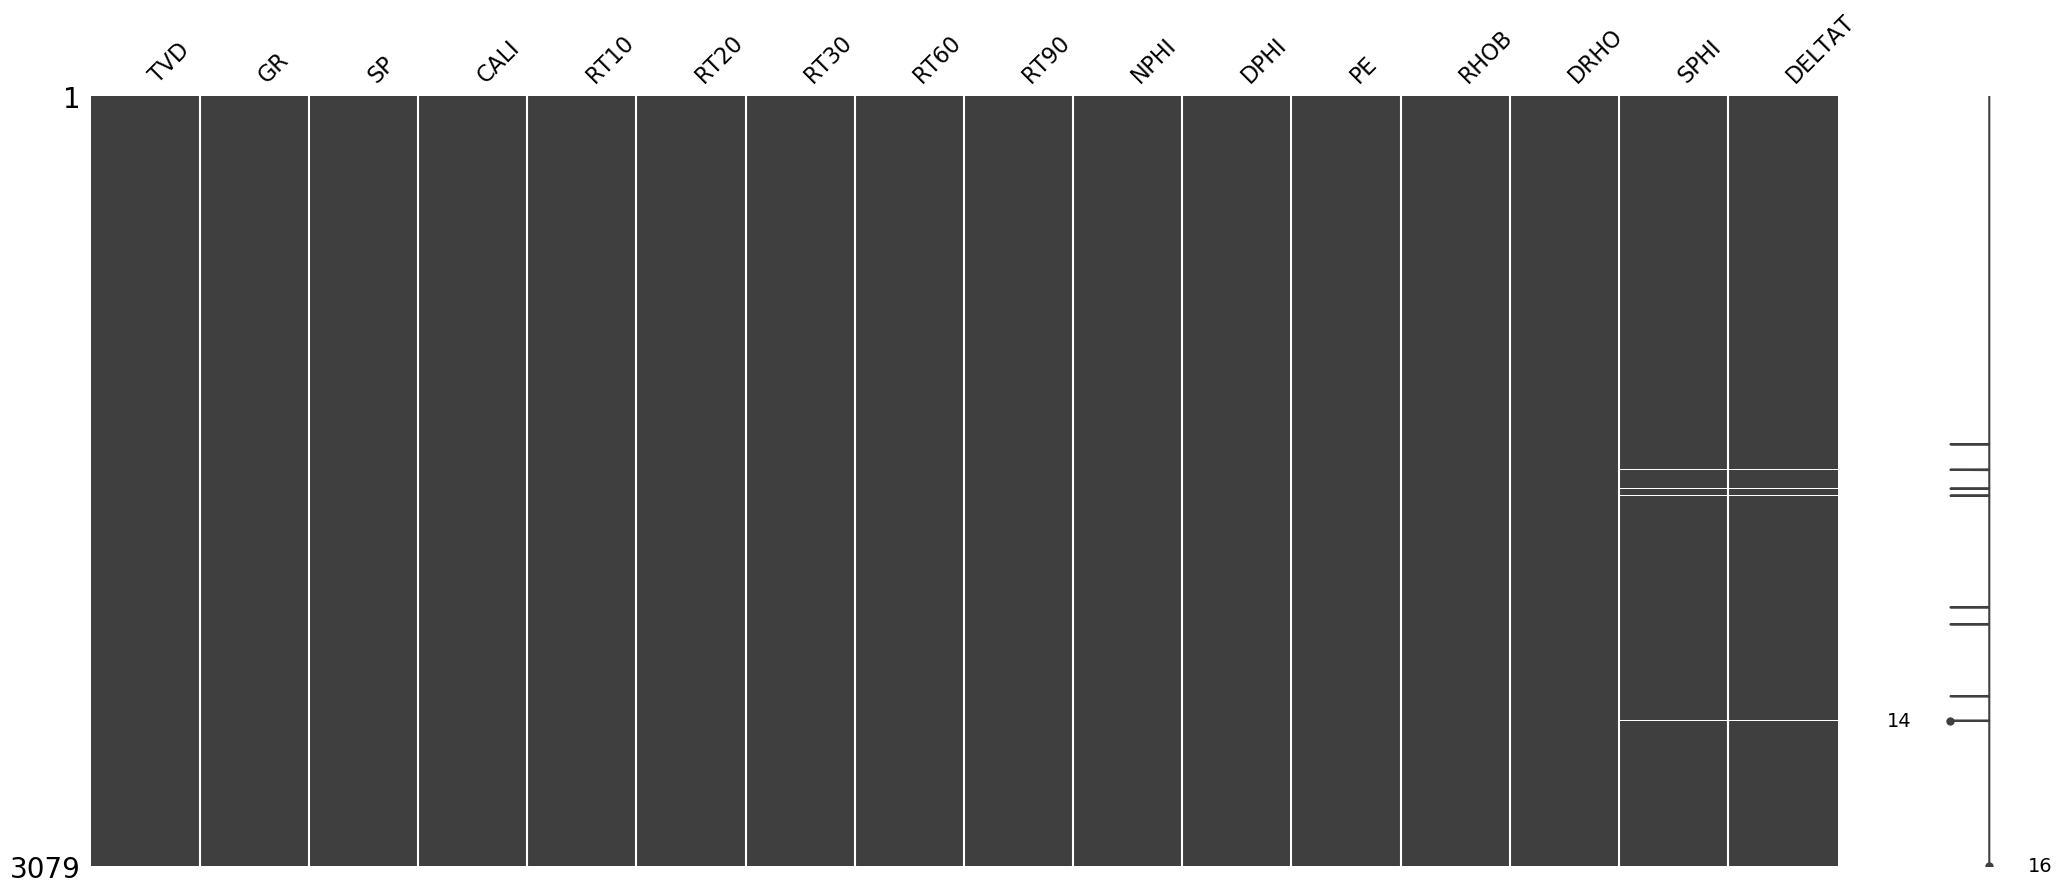

In [74]:
missingno.matrix(pdata)

Good news! it seems we do not have any 'NULL' value

# Visualizations

## Lithology logs

The spontaneous potential (SP) log is  used to detect permeable beds and to estimate formation water salinity and formation clay content while Gamma ray (GR) logs measure the natural radioactivity in formations and can be used for identifying lithologies and for correlating zones.

<Figure size 400x800 with 0 Axes>

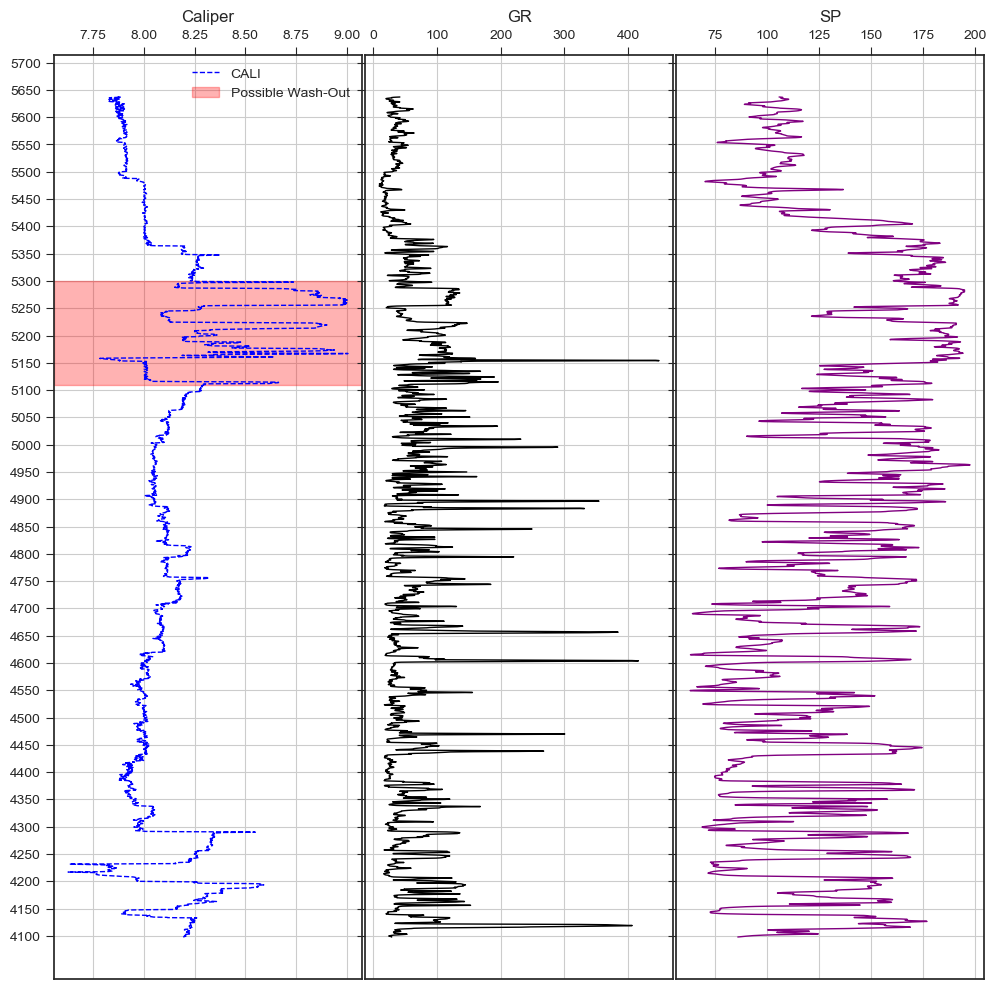

In [224]:
plt.style.use('seaborn-ticks')
plt.figure(figsize=(4,8))
fig, ax = plt.subplots(1,3,sharex='col', sharey='row' , gridspec_kw={'hspace': 0, 'wspace': 0.01}, figsize=(12, 12)) 

ax[0].plot(pdata['CALI'],pdata['TVD'],'--', linewidth=1,color='b',label = 'CALI')
ax[0].grid()
ax[0].set_title('Caliper')
ax[0].axhspan(5110,5300,color='red',alpha=0.3,label='Possible Wash-Out')
ax[0].xaxis.set_ticks_position('top')
ax[0].legend(loc ='upper right')

ax[1].plot(pdata['GR'],pdata['TVD'], linewidth=1,label = 'GR', color = 'black')
ax[1].set_title('GR')
ax[1].xaxis.set_ticks_position('top')
ax[1].grid()

ax[2].plot(pdata['SP'],pdata['TVD'],linewidth=1, color = 'purple')
ax[2].set_title('SP')
ax[2].xaxis.set_ticks_position('top')
ax[2].grid()

plt.yticks(np.arange(4100, 5750, 50))
plt.show()

# Density Logs

## Interpretation goals
– Porosity
– Lithology identification (from
PE and/or with Sonic and/or
Neutron)
– Gas indication (with Neutron)
– Synthetic seismograms (with
Sonic)
– Formation mechanical
properties (with Sonic)
– Clay content (shaliness)(with
Neutron)

In [235]:
left_value = 0
right_value = 0.6

right_value_for_dens = 450
densityspan = abs(left_value-right_value_for_dens)
color_index_for_dens = np.arange(left_value, right_value_for_dens, densityspan/100)

span = abs(left_value-right_value)

cmap2=plt.get_cmap('summer')
cmap1 = plt.get_cmap('Wistia')
cmap3 = plt.get_cmap('Blues')
color_index = np.arange(left_value, right_value, span/100)

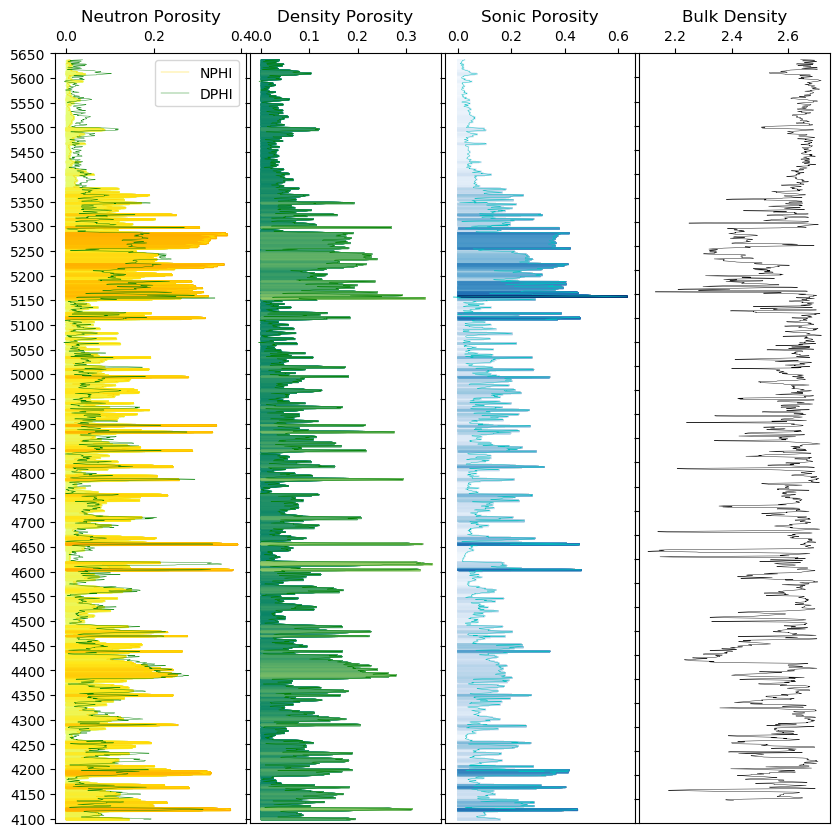

In [258]:
plt.style.use('default')
fig, ax = plt.subplots(1,4, sharex='col', sharey='row' , gridspec_kw={'hspace': 0, 'wspace': 0.02}, figsize=(10,10)) 

ax[0].plot(pdata['NPHI'],pdata['TVD'], color = "gold", linewidth="0.3", label = 'NPHI')
ax[0].set_title('Neutron Porosity')
ax[0].xaxis.set_ticks_position('top')
#Also plotting DPHI for ease of comparison
ax[0].plot(pdata['DPHI'],pdata['TVD'], color = "g",linewidth="0.3", label = 'DPHI')
ax[0].xaxis.set_ticks_position('top')
ax[0].legend()

ax[1].plot(pdata['DPHI'],pdata['TVD'], color = "g",linewidth="0.3")
ax[1].set_title('Density Porosity')
ax[1].xaxis.set_ticks_position('top')


ax[2].plot(pdata['SPHI'], pdata['TVD'], color= "c",linewidth="0.3")
ax[2].xaxis.set_ticks_position('top')
ax[2].set_title('Sonic Porosity')

ax[3].plot(pdata['RHOB'], pdata['TVD'], color= "black",linewidth="0.3")
ax[3].xaxis.set_ticks_position('top')
ax[3].set_title('Bulk Density')

    
for index in sorted(color_index):
    index_value = (index - left_value)/span
    color1 = cmap1(index_value)
    color2 = cmap2(index_value)
    color3 = cmap3(index_value)
    ax[2].fill_betweenx(pdata['TVD'], left_value, pdata['SPHI'], where=pdata['SPHI']>=index, color=color3)
    ax[1].fill_betweenx(pdata['TVD'], left_value, pdata['DPHI'], where=pdata['DPHI']>=index, color=color2)
    ax[0].fill_betweenx(pdata['TVD'], left_value, pdata['NPHI'], where=pdata['NPHI']>=index, color=color1)
    

plt.ylim(4090, 5650)
plt.yticks(np.arange(4050, 5700, 50))
plt.show()

## Resistivity Logs

Resistivity logs are electrical well logs that record the resistivity of a formation. Resistivity logs can be interpreted to infer information about the porosity of a formation, the water saturation, and the presence of hydrocarbons.

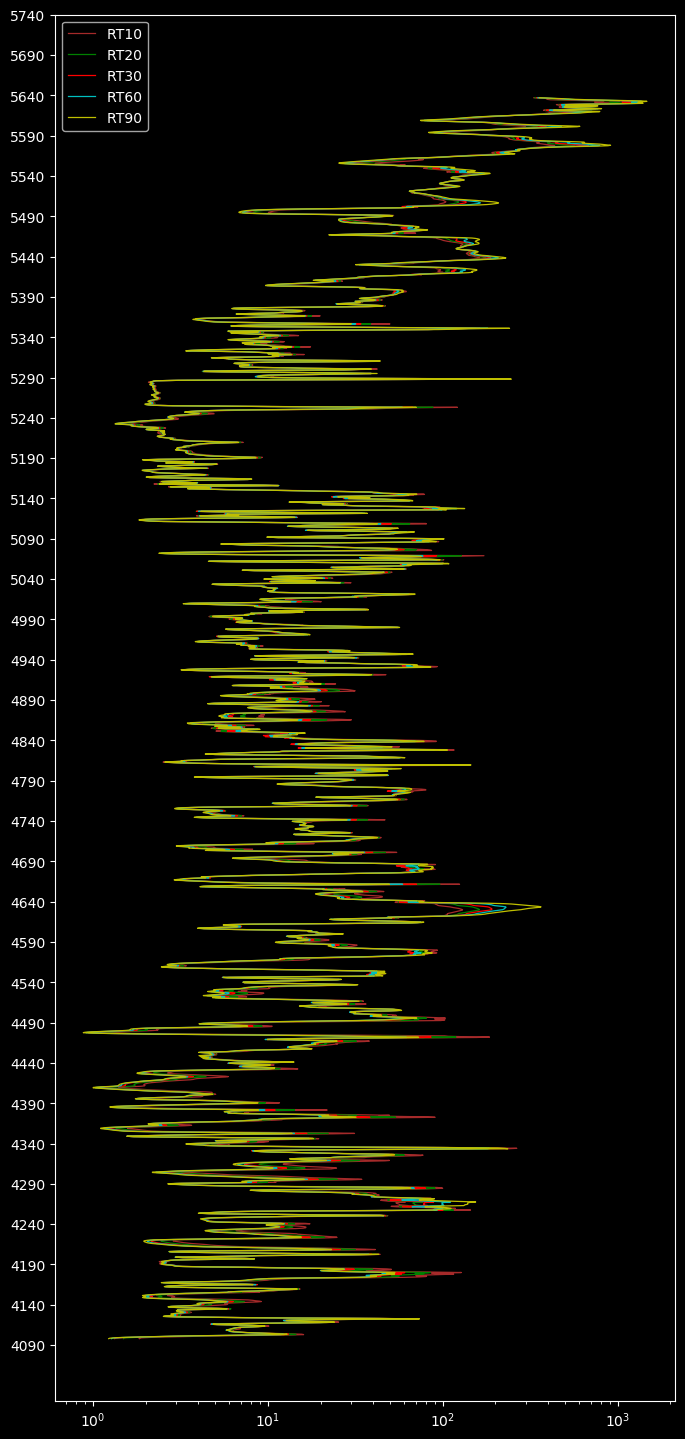

In [220]:

plt.style.use('dark_background')
plt.figure(figsize=(8,18))


plt.plot(pdata['RT10'],pdata['TVD'], color = "brown",linewidth="0.9", label = 'RT10')
plt.plot(pdata['RT20'],pdata['TVD'], color = "g",linewidth="0.9", label = 'RT20')
plt.plot(pdata['RT30'],pdata['TVD'], color = "r",linewidth="0.9", label = 'RT30')
plt.plot(pdata['RT60'],pdata['TVD'], color = "c",linewidth="0.9", label = 'RT60')
plt.plot(pdata['RT90'],pdata['TVD'], color = "y",linewidth="0.9", label = 'RT90')

plt.semilogx()  #utilizing the log scale for better understanding
plt.legend()


plt.yticks(np.arange(4090, 5750, 50))
plt.show()

Resources and references:

http://www.bioline.org.br/pdf?ja15068, 


https://petgeo.weebly.com/well-logging.html

https://matplotlib.org/

https://www.uio.no/studier/emner/matnat/geofag/GEO4250/v08/undervisningsmateriale/Lectures/BWLA%20-%20Porosity%20Logs.pdf